In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
sns.set_context('talk')
sns.set_palette(sns.color_palette(plt.cm.tab20.colors))

# Load COVID-19 data

In [2]:
covid_df = pd.read_csv(
#     '../COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
)
covid_df['Country/Region'] = covid_df['Country/Region'].map(lambda x: x.strip('*'))
print(covid_df.shape)
covid_df.head()

(450, 58)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,48,50,50,50,53,59,70,75,82,114
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,420,461,502,511,581,639,639,701,773,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,130,138,150,150,160,178,178,200,212,226
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,83,93,99,117,129,149,149,197,238,428


In [3]:
date_cols = covid_df.columns[4:]
covid_df['region_name'] = covid_df\
    .apply(lambda row: row['Country/Region'] if pd.isnull(row['Province/State']) or row['Province/State'] == row['Country/Region']\
           else '{}, {}'.format(row['Province/State'], row['Country/Region']),
           axis=1)

In [4]:
covid_df.sort_values(date_cols[-1], ascending=False)\
    .head(20)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,region_name
155,Hubei,China,30.9756,112.2707,444,444,549,761,1058,1423,...,67666,67707,67743,67760,67773,67781,67786,67790,67794,"Hubei, China"
16,NaN,Italy,43.0000,12.0000,0,0,0,0,0,0,...,5883,7375,9172,10149,12462,12462,17660,21157,21157,Italy
156,NaN,Iran,32.0000,53.0000,0,0,0,0,0,0,...,5823,6566,7161,8042,9000,10075,11364,12729,13938,Iran
157,NaN,"Korea, South",36.0000,128.0000,1,1,2,2,3,4,...,7041,7314,7478,7513,7755,7869,7979,8086,8162,"Korea, South"
18,NaN,Spain,40.0000,-4.0000,0,0,0,0,0,0,...,500,673,1073,1695,2277,2277,5232,6391,7798,Spain
11,NaN,Germany,51.0000,9.0000,0,0,0,0,0,1,...,799,1040,1176,1457,1908,2078,3675,4585,5426,Germany
158,France,France,46.2276,2.2137,0,0,2,3,3,3,...,949,1126,1209,1784,2281,2281,3661,4469,4499,France
31,NaN,Switzerland,46.8182,8.2275,0,0,0,0,0,0,...,268,337,374,491,652,652,1139,1359,2200,Switzerland
159,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,...,1352,1352,1352,1353,1356,1356,1356,1356,1360,"Guangdong, China"
160,Henan,China,33.8820,113.6140,5,5,9,32,83,128,...,1272,1272,1272,1272,1273,1273,1273,1273,1273,"Henan, China"


In [5]:
top_regions = covid_df.sort_values(date_cols[-1], ascending=False)\
    .head(20)['region_name']

In [6]:
# melt
covid_df_m = covid_df.melt(value_vars=date_cols, 
                           id_vars='region_name', 
                           value_name='n_confirmed',
                          var_name='date')
covid_df_m['date'] = pd.to_datetime(covid_df_m['date'])
covid_df_m.head()

,region_name,date,n_confirmed
0,Thailand,2020-01-22,2
1,Japan,2020-01-22,2
2,Singapore,2020-01-22,0
3,Nepal,2020-01-22,0
4,Malaysia,2020-01-22,0


In [7]:
# country-level
covid_df_country = covid_df.groupby('Country/Region')[date_cols].sum()

In [8]:
top_countries = covid_df_country.sort_values(date_cols[-1], ascending=False)\
    .head(20).index    

In [9]:
covid_df_country_m = covid_df_country.reset_index().melt(value_vars=date_cols, 
                           id_vars='Country/Region', 
                           value_name='n_confirmed',
                          var_name='date')
covid_df_country_m['date'] = pd.to_datetime(covid_df_country_m['date'])
covid_df_country_m.head()

,Country/Region,date,n_confirmed
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Antigua and Barbuda,2020-01-22,0


/Users/zichen/venv37/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


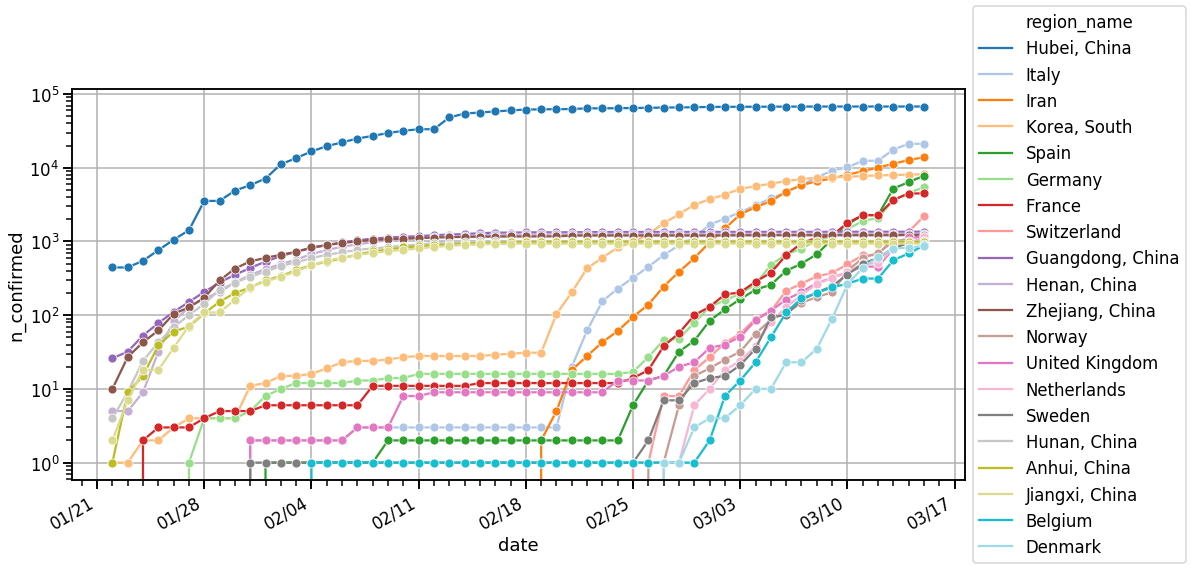

In [10]:
fig, ax = plt.subplots(figsize=(16, 8))
ax = sns.lineplot(x='date', 
                  y='n_confirmed',
                  hue='region_name',
                  hue_order=top_regions,
                  data=covid_df_m.loc[covid_df_m['region_name'].isin(top_regions)],
                  marker='o',
                  ax=ax
                 )
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_yscale('log')

weeks = mdates.WeekdayLocator()
days = mdates.DayLocator()
week_fmt = mdates.DateFormatter('%m/%d')

# format the ticks
ax.xaxis.set_major_locator(weeks)
ax.xaxis.set_major_formatter(week_fmt)
ax.xaxis.set_minor_locator(days)

ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

In [11]:
!mkdir -p figs

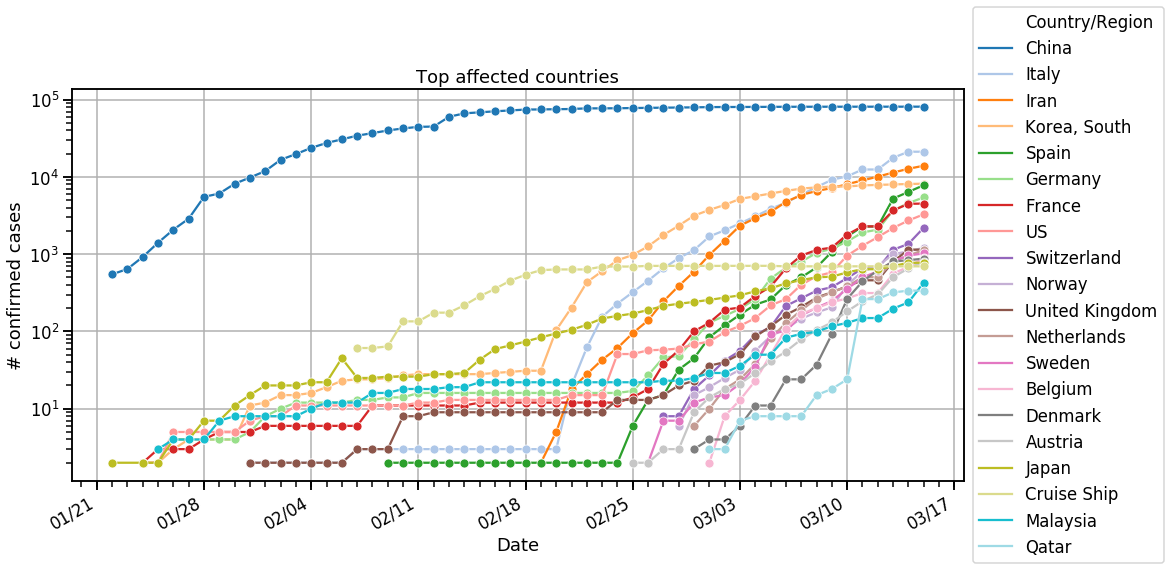

In [12]:
fig, ax = plt.subplots(figsize=(16, 8))
ax = sns.lineplot(x='date', 
                  y='n_confirmed',
                  hue='Country/Region',
                  hue_order=top_countries,
                  data=covid_df_country_m.loc[covid_df_country_m['Country/Region'].isin(top_countries)]\
                      .query('n_confirmed > 1'),
                  marker='o',
                  ax=ax
                 )
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_yscale('log')
ax.set(title='Top affected countries', 
       ylabel='# confirmed cases', 
       xlabel='Date')


weeks = mdates.WeekdayLocator()
days = mdates.DayLocator()
week_fmt = mdates.DateFormatter('%m/%d')

# format the ticks
ax.xaxis.set_major_locator(weeks)
ax.xaxis.set_major_formatter(week_fmt)
ax.xaxis.set_minor_locator(days)

ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()
fig.savefig('figs/top_countries.png', 
           bbox_extra_artists=(lgd,), bbox_inches='tight')

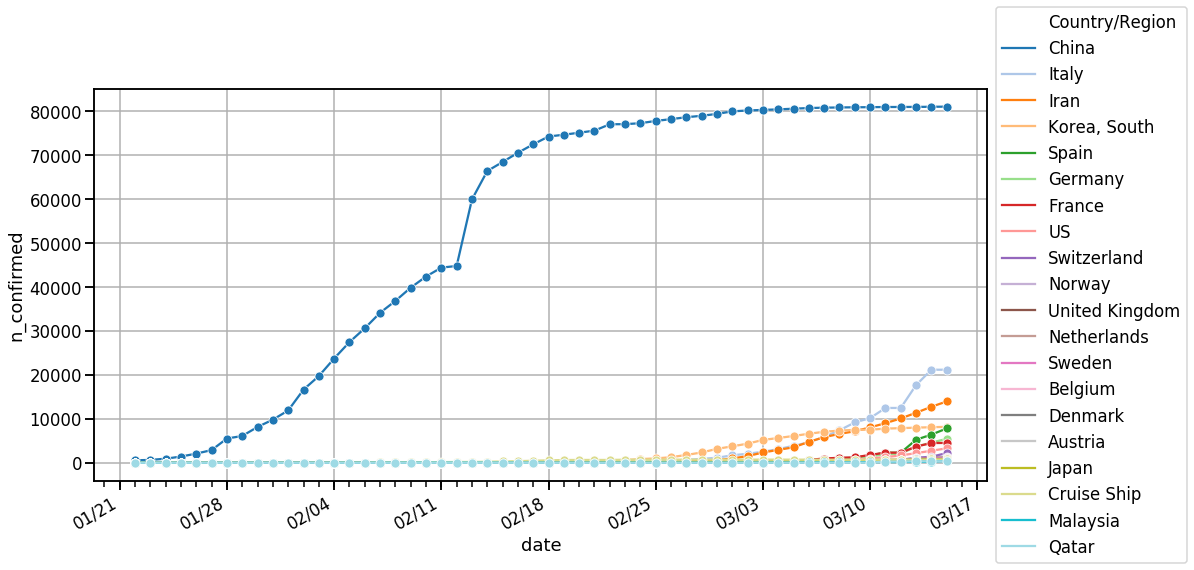

In [13]:
fig, ax = plt.subplots(figsize=(16, 8))
ax = sns.lineplot(x='date', 
                  y='n_confirmed',
                  hue='Country/Region',
                  hue_order=top_countries,
                  data=covid_df_country_m.loc[covid_df_country_m['Country/Region'].isin(top_countries)],
                  marker='o',
                  ax=ax
                 )
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


weeks = mdates.WeekdayLocator()
days = mdates.DayLocator()
week_fmt = mdates.DateFormatter('%m/%d')

# format the ticks
ax.xaxis.set_major_locator(weeks)
ax.xaxis.set_major_formatter(week_fmt)
ax.xaxis.set_minor_locator(days)

ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

# Curve fitting

In [14]:
import statsmodels.api as sm
from scipy.optimize import curve_fit

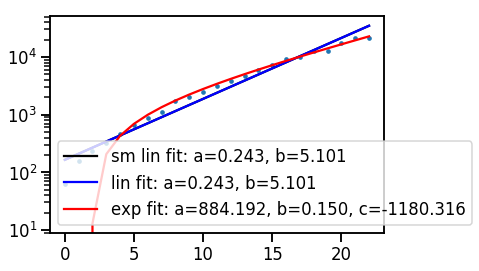

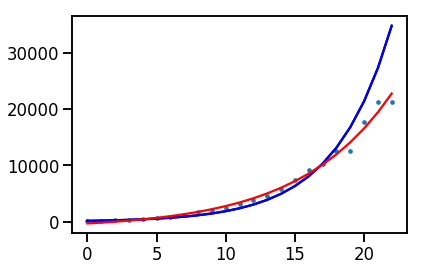

In [15]:
n_confirmed = covid_df_country.loc['Italy']
# n_confirmed = covid_df_country.loc['China']
# remove the first several days with < 50 cases
mask = n_confirmed > 50 

y = n_confirmed[mask].values
x = np.arange(len(y))


# linear in log space (sm)
X = sm.add_constant(x)
model = sm.OLS(np.log(y),X)
results = model.fit()

# linear in log space (numpy)
# f_lin = lambda t, a, b: a+b*t
f_lin = lambda t, a, b: np.exp(b) * np.exp(a*t)
popt_lin = np.polyfit(x, np.log(y), 1, 
#                       w=np.log(y)
                     )

# exponential function
f = lambda t,a,b,c: a*np.exp(b*t) + c
popt, pcov = curve_fit(f, x, y)
# # sigmoid
# f_sigmoid = lambda t, a, b: a+b*(1/(1+np.exp(-t)))
# popt_sigmoid, pcov_sigmoid = curve_fit(f_sigmoid, x, y)

plt.scatter(x, y, s=10);

plt.plot(x, f_lin(x, results.params[1], results.params[0]), 'k-',
         label='sm lin fit: a=%5.3f, b=%5.3f' % (results.params[1], results.params[0]))

plt.plot(x, f_lin(x, *popt_lin), 'b-',
         label='lin fit: a=%5.3f, b=%5.3f' % tuple(popt_lin))

plt.plot(x, f(x, *popt), 'r-',
         label='exp fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
# plt.plot(x, f_sigmoid(x, *popt_sigmoid), 'g-',
#          label='sigmoid fit: a=%5.3f, b=%5.3f' % tuple(popt_sigmoid))


plt.yscale('log')
plt.legend()
plt.show()


plt.scatter(x, y, s=10);

plt.plot(x, f_lin(x, results.params[1], results.params[0]), 'k-',
         label='sm lin fit: a=%5.3f, b=%5.3f' % (results.params[1], results.params[0]))
plt.plot(x, f_lin(x, *popt_lin), 'b-',
         label='lin fit: a=%5.3f, b=%5.3f' % tuple(popt_lin))
plt.plot(x, f(x, *popt), 'r-',
         label='exp fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
# plt.plot(x, f_sigmoid(x, *popt_sigmoid), 'g-',
#          label='sigmoid fit: a=%5.3f, b=%5.3f' % tuple(popt_sigmoid))
plt.show()

Exponetial function:

$ y = e^{a + bt} $

In [16]:
f_exponetial = lambda t, a, b: np.exp(a+b*t)

def fit_exponential(y, y_min=50, n_data_points=None):
    '''Fit exponential function to curve
    '''
    mask = y >= y_min
    
    y = y[mask]
    x = np.arange(len(y))
    
    if n_data_points:
        # fit at most the first n days
        right_idx = min(n_data_points, len(x))
        x = x[:right_idx]
        y = y[:right_idx]
    
    X = sm.add_constant(x)
    model = sm.OLS(np.log(y),X)
    results = model.fit()

    a, b = results.params
    p_a, p_b = results.pvalues
    return (a, b), (p_a, p_b)

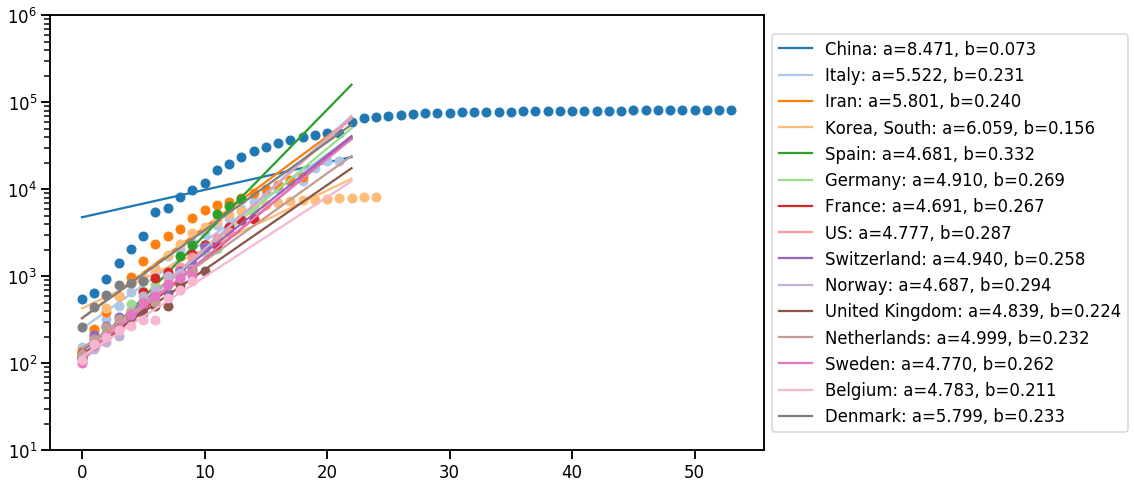

In [17]:
y_min = 100
n_data_points = None # use all data points for fitting

fig, ax = plt.subplots(figsize=(16, 8))

for i, country in enumerate(top_countries[:15]):
    c = plt.cm.tab20.colors[i]
    
    n_confirmed = covid_df_country.loc[country]

    (a, b), _ = fit_exponential(n_confirmed.values, y_min=y_min, n_data_points=n_data_points)
    
    ax.plot(n_confirmed[n_confirmed>y_min].values, 
            color=c, 
            marker='o',
            ls='none'
              )
    ax.plot(x, f_exponetial(x, a, b), color=c,
             label='%s: a=%5.3f, b=%5.3f' % (country, a, b)
           )

ax.set_yscale('log')
ax.set_ylim([10, 1e6])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [18]:
# remove Cruise Ship
covid_df_country = covid_df_country.drop(['Cruise Ship'], axis=0)

In [19]:
y_min = 100
n_data_points = [None, # use all data points for fitting
                 30, # use the first 30 days for fitting
                 20,
                 10
                ] 

fitted_exp_params_df = []

for country in covid_df_country.index:    
    n_confirmed = covid_df_country.loc[country]
    if (n_confirmed > y_min).sum() >= 5: # the cumulative cases are at least 100 for 5 days 
        
        n_data_points_avail = (n_confirmed >= y_min).sum()
        for n in n_data_points:
            if (n is not None and n < n_data_points_avail) or n is None:
                # only fit the first n days if there are more data points avail 
                (a, b), (p_a, p_b) = fit_exponential(n_confirmed.values, y_min=y_min, n_data_points=n)
                if n is None:
                    n = n_data_points_avail                
                fitted_exp_params_df.append({
                    'country': country, 
                    'a': a,
                    'b': b,
                    'pval_a': p_a,
                    'pval_b': p_b,
                    'y_min': y_min,
                    'n_data_points': n
                })
            
fitted_exp_params_df = pd.DataFrame(fitted_exp_params_df)
print(fitted_exp_params_df.shape)

(41, 7)


In [20]:
fitted_exp_params_df.sort_values('b', ascending=False)

,country,a,b,pval_a,pval_b,y_min,n_data_points
15,Iran,5.160493,0.394269,2.959117e-11,3.646760e-08,100,10
8,China,6.226213,0.349077,8.464288e-13,1.252283e-08,100,10
25,"Korea, South",5.087837,0.346502,4.190580e-10,1.187386e-06,100,10
32,Spain,4.681355,0.331797,8.765772e-17,1.312797e-13,100,14
33,Spain,4.705317,0.325819,1.103926e-12,3.065652e-09,100,10
19,Italy,5.145583,0.313156,7.423025e-14,5.848758e-10,100,10
1,Austria,4.600166,0.304637,6.446409e-11,1.399816e-07,100,8
11,France,4.563615,0.299949,8.239660e-12,3.378716e-08,100,10
38,US,4.742395,0.296693,4.199345e-14,2.664064e-10,100,10
28,Norway,4.686874,0.293997,5.300871e-11,3.018344e-07,100,10


In [21]:
# get the max `b` among all the fits for each country
fitted_exp_params_df_max = fitted_exp_params_df\
    .sort_values('b', ascending=False)\
    .groupby('country')\
    .first()\
    .sort_values('b', ascending=False)

print(fitted_exp_params_df_max.shape)
fitted_exp_params_df_max

(24, 6)


,a,b,pval_a,pval_b,y_min,n_data_points
country,,,,,,
Iran,5.160493,0.394269,2.959117e-11,3.646760e-08,100,10
China,6.226213,0.349077,8.464288e-13,1.252283e-08,100,10
"Korea, South",5.087837,0.346502,4.190580e-10,1.187386e-06,100,10
Spain,4.681355,0.331797,8.765772e-17,1.312797e-13,100,14
Italy,5.145583,0.313156,7.423025e-14,5.848758e-10,100,10
Austria,4.600166,0.304637,6.446409e-11,1.399816e-07,100,8
France,4.563615,0.299949,8.239660e-12,3.378716e-08,100,10
US,4.742395,0.296693,4.199345e-14,2.664064e-10,100,10
Norway,4.686874,0.293997,5.300871e-11,3.018344e-07,100,10


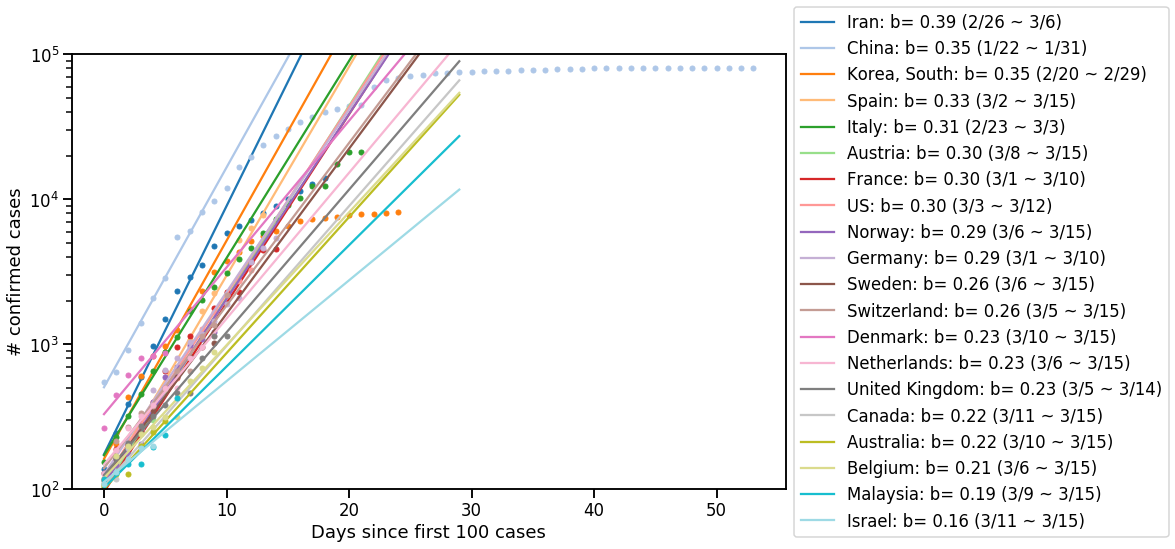

In [22]:
fig, ax = plt.subplots(figsize=(16, 8))

i = 0
for country, row in fitted_exp_params_df_max.head(20).iterrows():
    c = plt.cm.tab20.colors[i]
    
    n_confirmed = covid_df_country.loc[country]
    
    

    a, b, n_data_points = row['a'], row['b'], row['n_data_points']
#     x = np.arange(n_data_points)
    x = np.arange(30)
    date0_with_100 = n_confirmed[n_confirmed > y_min].index[0][:-3]
    datet_with_100 = n_confirmed[n_confirmed > y_min].index[n_data_points-1][:-3]
    
    ax.plot(n_confirmed[n_confirmed>y_min].values, 
            color=c, 
            marker='o',
            ls='none',
            markersize=5
              )
    ax.plot(x, f_exponetial(x, a, b), color=c,
             label='%s: b=%5.2f (%s ~ %s)' % (country, b, date0_with_100, datet_with_100)
           )
    
    i += 1

ax.set_yscale('log')
ax.set_ylim([100, 1e5])
ax.set(
       ylabel='# confirmed cases',
       xlabel='Days since first %d cases' % y_min
      )
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

fig.savefig('figs/top_countries_fastest_growth.png', 
           bbox_extra_artists=(lgd,), bbox_inches='tight')

# External data
- World population data from [the World Bank](https://data.worldbank.org/indicator/SP.POP.TOTL)
- World area data from [the World Bank](https://data.worldbank.org/indicator/AG.SRF.TOTL.K2?most_recent_value_desc=true)
- US population data from [US Census Bereau](https://www.census.gov/data/tables/time-series/demo/popest/2010s-national-total.html)
- US area data from [US Census Bereau](https://www.census.gov/geographies/reference-files/2010/geo/state-area.html)

In [23]:
world_pop_df = pd.read_csv(
    'data/population/API_SP.POP.TOTL_DS2_en_csv_v2_821007/API_SP.POP.TOTL_DS2_en_csv_v2_821007.csv',
    skiprows=4
).set_index('Country Name')
print(world_pop_df.shape)
world_pop_df.head()

(264, 64)


,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,...,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,NaN,NaN
Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,...,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,NaN,NaN
Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,...,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,NaN,NaN
Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,...,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,NaN,NaN
Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,...,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,NaN,NaN


In [24]:
world_area_df = pd.read_csv(
    'data/area/API_AG.SRF.TOTL.K2_DS2_en_csv_v2_823612/API_AG.SRF.TOTL.K2_DS2_en_csv_v2_823612.csv',
    skiprows=4
).set_index('Country Name')
print(world_area_df.shape)
world_area_df.head()

(264, 64)


,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,Surface area (sq. km),AG.SRF.TOTL.K2,NaN,180.0,180.0,180.0,180.0,180.0,180.0,...,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,NaN,NaN
Afghanistan,AFG,Surface area (sq. km),AG.SRF.TOTL.K2,NaN,652860.0,652860.0,652860.0,652860.0,652860.0,652860.0,...,652860.0,652860.0,652860.0,652860.0,652860.0,652860.0,652860.0,652860.0,NaN,NaN
Angola,AGO,Surface area (sq. km),AG.SRF.TOTL.K2,NaN,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,...,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,NaN,NaN
Albania,ALB,Surface area (sq. km),AG.SRF.TOTL.K2,NaN,28750.0,28750.0,28750.0,28750.0,28750.0,28750.0,...,28750.0,28750.0,28750.0,28750.0,28750.0,28750.0,28750.0,28750.0,NaN,NaN
Andorra,AND,Surface area (sq. km),AG.SRF.TOTL.K2,NaN,470.0,470.0,470.0,470.0,470.0,470.0,...,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,NaN,NaN


In [25]:
world_hospital_df = pd.read_csv(
    'data/hospital_beds/API_SH.MED.BEDS.ZS_DS2_en_csv_v2_821439/API_SH.MED.BEDS.ZS_DS2_en_csv_v2_821439.csv',
    skiprows=4
).set_index('Country Name')
print(world_hospital_df.shape)
world_hospital_df.head()

(264, 64)


,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,0.170627,NaN,NaN,NaN,NaN,NaN,NaN,...,0.4,0.5,0.5,0.5,0.5,NaN,NaN,NaN,NaN,NaN
Angola,AGO,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,2.061462,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,ALB,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,5.102676,NaN,NaN,NaN,NaN,NaN,NaN,...,2.6,2.9,2.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,AND,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# get latest values for each country
year_cols = world_hospital_df.columns[3:-1]

def get_latest_value(row):
    vals = row[year_cols].dropna()
    if len(vals) == 0:
        return np.nan
    else:
        return vals[-1]

world_hospital_df['hospital_beds_per_1k'] = world_hospital_df.apply(
    get_latest_value,
    axis=1
)

In [27]:
world_meta_df = pd.concat([
    world_pop_df[['2018']].rename(columns={'2018': 'population'}),
    world_area_df[['2018']].rename(columns={'2018': 'area'}),
    world_hospital_df[['hospital_beds_per_1k']]
], axis=1)
print(world_meta_df.shape)
world_meta_df.head()

(264, 3)


,population,area,hospital_beds_per_1k
Country Name,,,
Aruba,105845.0,180.0,NaN
Afghanistan,37172386.0,652860.0,0.5
Angola,30809762.0,1246700.0,0.8
Albania,2866376.0,28750.0,2.9
Andorra,77006.0,470.0,2.5


In [28]:
# Add info for Taiwan
# according to https://en.wikipedia.org/wiki/Taiwan
world_meta_df.loc['Taiwan'] = [23780452, 36197, 6.3]

In [29]:
set(covid_df_country.index.tolist()) - set(world_meta_df.index)

{'Brunei',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Czechia',
 'Egypt',
 'Guadeloupe',
 'Guernsey',
 'Holy See',
 'Iran',
 'Jersey',
 'Korea, South',
 'Martinique',
 'Reunion',
 'Russia',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'Slovakia',
 'US',
 'Venezuela',
 'occupied Palestinian territory'}

In [30]:
# rename countries to make them consistent
world_meta_df.rename(index={
    'Iran, Islamic Rep.': 'Iran',
    'Korea, Rep.': 'Korea, South',
    'United States': 'US',
    'Brunei Darussalam': 'Brunei',
    'Congo, Dem. Rep.': 'Congo (Kinshasa)',
    'Egypt, Arab Rep.': 'Egypt',
    'Russian Federation': 'Russia',
    'Slovak Republic': 'Slovakia',
}, inplace=True)

In [31]:
shared_countries = covid_df_country.index.intersection(world_meta_df.index)
len(shared_countries)

134

## Normalize by population

In [32]:
covid_df_country_n_pop = covid_df_country.loc[shared_countries].transpose() * 1e6 / \
    world_meta_df.loc[shared_countries, 'population']
covid_df_country_n_pop = covid_df_country_n_pop.transpose()\
    .sort_values(date_cols[-1], ascending=False)
covid_df_country_n_pop.index.name = 'country'

covid_df_country_n_pop[[date_cols[-1]]].rename(columns={date_cols[-1]: 'Cases per 1M on %s' % date_cols[-1]})

,Cases per 1M on 3/15/20
country,
San Marino,2723.101968
Iceland,455.350224
Italy,350.100129
Switzerland,258.320776
Norway,227.121507
...,...
Sudan,0.023923
Congo (Kinshasa),0.023790
Kenya,0.019458


In [33]:
top_countries = covid_df_country_n_pop.head(20).index

In [34]:
# melt
covid_df_country_n_pop_m = covid_df_country_n_pop\
    .iloc[:20]\
    .reset_index().melt(value_vars=date_cols, 
                           id_vars='country', 
                           value_name='n_confirmed',
                          var_name='date')
covid_df_country_n_pop_m['date'] = pd.to_datetime(covid_df_country_n_pop_m['date'])
covid_df_country_n_pop_m.head()

,country,date,n_confirmed
0,San Marino,2020-01-22,0.0
1,Iceland,2020-01-22,0.0
2,Italy,2020-01-22,0.0
3,Switzerland,2020-01-22,0.0
4,Norway,2020-01-22,0.0


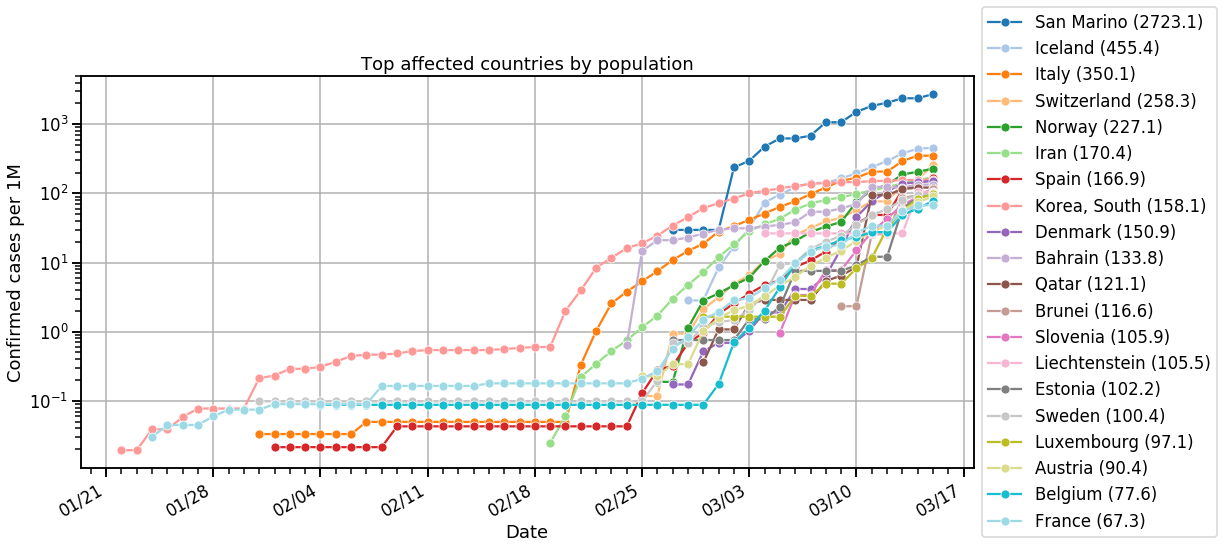

In [35]:
fig, ax = plt.subplots(figsize=(16, 8))
ax = sns.lineplot(x='date', 
                  y='n_confirmed',
                  hue='country',
                  hue_order=covid_df_country_n_pop.index[:20],
                  data=covid_df_country_n_pop_m.query('n_confirmed > 1e-2'),
                  marker='o',
                  ax=ax
                 )

top_countries_labels = ['%s (%.1f)' % (country, num)
    for country, num \
    in zip(covid_df_country_n_pop.index[:20], covid_df_country_n_pop[date_cols[-1]])]

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
lgd = ax.legend(
    labels=top_countries_labels, 
    loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_yscale('log')
ax.set(ylabel='Confirmed cases per 1M', xlabel='Date', title='Top affected countries by population')

weeks = mdates.WeekdayLocator()
days = mdates.DayLocator()
week_fmt = mdates.DateFormatter('%m/%d')

# format the ticks
ax.xaxis.set_major_locator(weeks)
ax.xaxis.set_major_formatter(week_fmt)
ax.xaxis.set_minor_locator(days)

ax.grid(True)

fig.autofmt_xdate()
fig.savefig('figs/top_countries_n_pop.png', 
           bbox_extra_artists=(lgd,), bbox_inches='tight')

## Normalize by area

In [36]:
covid_df_country_n_area = covid_df_country.loc[shared_countries].transpose() * 100 / \
    world_meta_df.loc[shared_countries, 'area']
covid_df_country_n_area = covid_df_country_n_area.transpose()\
    .sort_values(date_cols[-1], ascending=False)
covid_df_country_n_area.index.name = 'country'

covid_df_country_n_area[[date_cols[-1]]].rename(columns={date_cols[-1]: 'Cases per km^2 on %s' % date_cols[-1]})

,Cases per km^2 on 3/15/20
country,
San Marino,153.333333
Singapore,31.432545
Bahrain,26.992287
"Korea, South",8.134424
Italy,7.020973
...,...
Mongolia,0.000064
Curacao,NaN
Kosovo,NaN


In [37]:
# melt
covid_df_country_n_area_m = covid_df_country_n_area\
    .iloc[:20]\
    .reset_index().melt(value_vars=date_cols, 
                           id_vars='country', 
                           value_name='n_confirmed',
                          var_name='date')
covid_df_country_n_area_m['date'] = pd.to_datetime(covid_df_country_n_area_m['date'])
covid_df_country_n_area_m.head()

,country,date,n_confirmed
0,San Marino,2020-01-22,0.000000
1,Singapore,2020-01-22,0.000000
2,Bahrain,2020-01-22,0.000000
3,"Korea, South",2020-01-22,0.000997
4,Italy,2020-01-22,0.000000


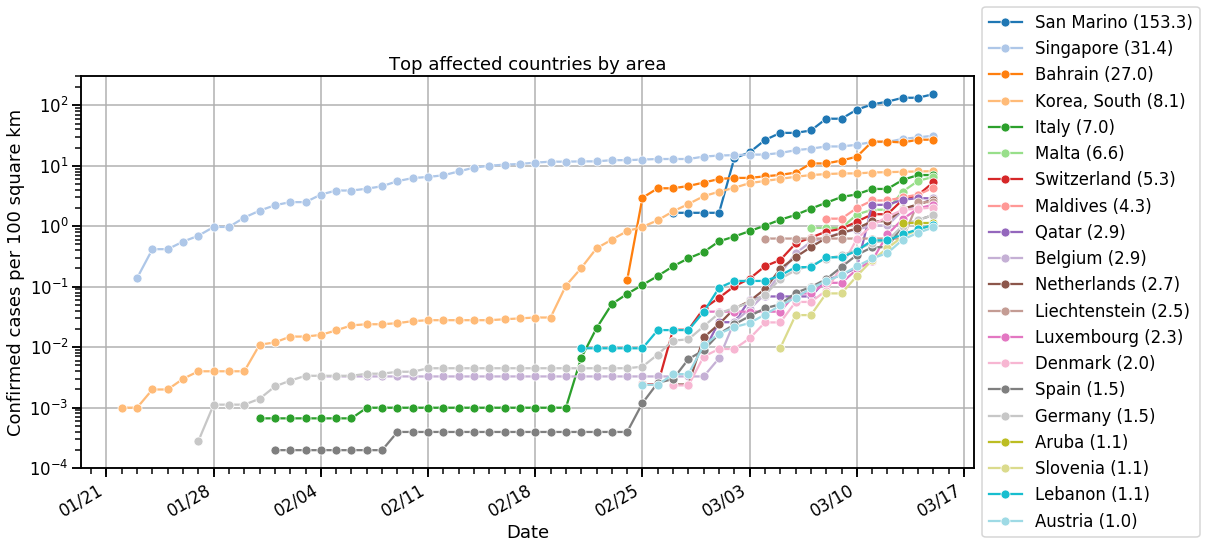

In [38]:
fig, ax = plt.subplots(figsize=(16, 8))
ax = sns.lineplot(x='date', 
                  y='n_confirmed',
                  hue='country',
                  hue_order=covid_df_country_n_area.index[:20],
                  data=covid_df_country_n_area_m.query('n_confirmed > 1e-4'),
                  marker='o',
                  ax=ax
                 )

top_countries_labels = ['%s (%.1f)' % (country, num)
    for country, num \
    in zip(covid_df_country_n_area.index[:20], covid_df_country_n_area[date_cols[-1]])]

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
lgd = ax.legend(
    labels=top_countries_labels, 
    loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_yscale('log')
ax.set(ylabel='Confirmed cases per 100 square km', 
       xlabel='Date',
       title='Top affected countries by area')

weeks = mdates.WeekdayLocator()
days = mdates.DayLocator()
week_fmt = mdates.DateFormatter('%m/%d')

# format the ticks
ax.xaxis.set_major_locator(weeks)
ax.xaxis.set_major_formatter(week_fmt)
ax.xaxis.set_minor_locator(days)

ax.grid(True)

fig.autofmt_xdate()
fig.savefig('figs/top_countries_n_area.png', 
           bbox_extra_artists=(lgd,), bbox_inches='tight')

## Normalize by total hospital beds

In [39]:
world_meta_df['estimated_hospital_beds'] = world_meta_df['hospital_beds_per_1k'] * world_meta_df['population'] / 1000
world_meta_df\
    .loc[shared_countries]\
    .sort_values('estimated_hospital_beds', ascending=False)\
    .head(20)

,population,area,hospital_beds_per_1k,estimated_hospital_beds
China,1.392730e+09,9.562910e+06,4.2,5.849466e+06
Japan,1.265291e+08,3.779700e+05,13.4,1.695490e+06
Russia,1.444780e+08,1.709825e+07,8.2,1.184720e+06
US,3.271674e+08,9.831510e+06,2.9,9.487856e+05
India,1.352617e+09,3.287259e+06,0.7,9.468321e+05
Germany,8.292792e+07,3.575800e+05,8.3,6.883018e+05
"Korea, South",5.163526e+07,1.003390e+05,11.5,5.938054e+05
Brazil,2.094693e+08,8.515770e+06,2.2,4.608325e+05
France,6.698724e+07,5.490870e+05,6.5,4.354171e+05
Ukraine,4.462252e+07,6.035500e+05,8.8,3.926781e+05


In [40]:
covid_df_country_n_beds = covid_df_country.loc[shared_countries].transpose() / \
    world_meta_df.loc[shared_countries, 'estimated_hospital_beds']
covid_df_country_n_beds = covid_df_country_n_beds.transpose()\
    .sort_values(date_cols[-1], ascending=False)
covid_df_country_n_beds.index.name = 'country'

covid_df_country_n_beds[[date_cols[-1]]].rename(columns={date_cols[-1]: 'Cases/hospital beds %s' % date_cols[-1]})

,Cases/hospital beds 3/15/20
country,
San Marino,0.716606
Iceland,0.142297
Iran,0.113594
Italy,0.102971
Qatar,0.100958
...,...
Uzbekistan,0.000008
Aruba,NaN
Curacao,NaN


In [41]:
# melt
covid_df_country_n_beds_m = covid_df_country_n_beds\
    .iloc[:20]\
    .reset_index().melt(value_vars=date_cols, 
                           id_vars='country', 
                           value_name='n_confirmed',
                          var_name='date')
covid_df_country_n_beds_m['date'] = pd.to_datetime(covid_df_country_n_beds_m['date'])
covid_df_country_n_beds_m.head()

,country,date,n_confirmed
0,San Marino,2020-01-22,0.0
1,Iceland,2020-01-22,0.0
2,Iran,2020-01-22,0.0
3,Italy,2020-01-22,0.0
4,Qatar,2020-01-22,0.0


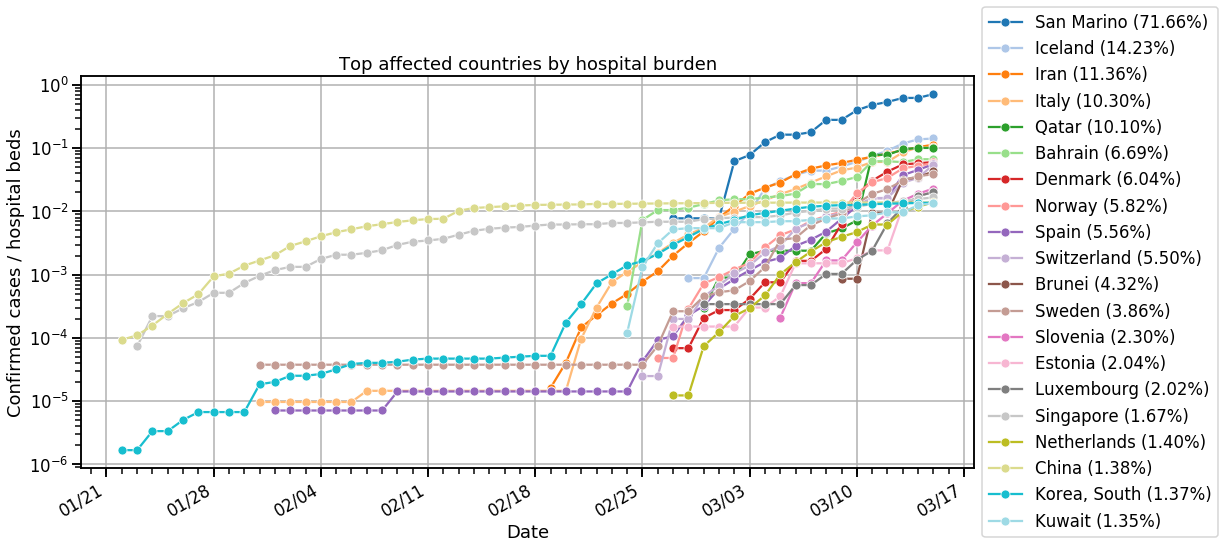

In [42]:
fig, ax = plt.subplots(figsize=(16, 8))
ax = sns.lineplot(x='date', 
                  y='n_confirmed',
                  hue='country',
                  hue_order=covid_df_country_n_beds.index[:20],
                  data=covid_df_country_n_beds_m.query('n_confirmed > 1e-6'),
                  marker='o',
                  ax=ax
                 )

top_countries_labels = ['%s (%.2f%%)' % (country, num * 100)
    for country, num \
    in zip(covid_df_country_n_beds.index[:20], covid_df_country_n_beds[date_cols[-1]])]

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
lgd = ax.legend(
    labels=top_countries_labels, 
    loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_yscale('log')
ax.set(ylabel='Confirmed cases / hospital beds', 
       xlabel='Date',
       title='Top affected countries by hospital burden'
      )

weeks = mdates.WeekdayLocator()
days = mdates.DayLocator()
week_fmt = mdates.DateFormatter('%m/%d')

# format the ticks
ax.xaxis.set_major_locator(weeks)
ax.xaxis.set_major_formatter(week_fmt)
ax.xaxis.set_minor_locator(days)

ax.grid(True)

fig.autofmt_xdate()
fig.savefig('figs/top_countries_n_hospital.png', 
           bbox_extra_artists=(lgd,), bbox_inches='tight')

In [43]:
world_meta_df.to_csv('data/world_meta_df.csv')

In [45]:
46/924

0.049783549783549784